In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
sns.set()
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [2]:
temp = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Maven%20Analytics%20Challenge/Telecom%2BCustomer%2BChurn/telecom_customer_churn.csv')

In [3]:
temp.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [8]:
temp['Total Revenue'] = temp['Total Revenue'].astype(int)
temp['Total Charges'] = temp['Total Charges'].astype(int)
temp['Total Refunds'] = temp['Total Refunds'].astype(int)
temp['Total Long Distance Charges'] = temp['Total Long Distance Charges'].astype(int)
temp['Total Extra Data Charges'] = temp['Total Extra Data Charges'].astype(int)
temp['Tenure in Months'] = temp['Tenure in Months'].astype(int)
temp['Number of Referrals'] = temp['Number of Referrals'].astype(int)
temp['Number of Dependents'] = temp['Number of Dependents'].astype(int)
temp['Monthly Charge'] = temp['Monthly Charge'].astype(int)

In [10]:
temp.corr()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.020010,-0.566518,0.134551,0.059685,0.024185,0.025036,0.003063,0.048266
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002898,0.300802,-0.125620,0.022535,0.013963,-0.014436,0.068970,0.038036
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.012298,-0.002859,-0.002514,0.001976,-0.003966,-0.014550,0.005072,0.002944
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.014450,-0.013485,-0.021669,-0.002786,-0.009982,-0.013233,0.008037,0.000082
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.015420,0.015195,0.021098,0.003813,-0.000420,0.010461,-0.006932,0.001062
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001800,0.080243,0.026343,0.250375,0.024619,0.000350,0.216196,0.261854
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012713,0.038173,0.239168,0.826074,0.058670,0.082266,0.674181,0.853147
Avg Monthly Long Distance Charges,-0.020010,-0.002898,0.012298,0.014450,-0.015420,0.001800,0.012713,1.000000,0.019047,0.019117,0.016944,-0.026155,0.021162,0.548754,0.173072
Avg Monthly GB Download,-0.566518,0.300802,-0.002859,-0.013485,0.015195,0.080243,0.038173,0.019047,1.000000,-0.017164,0.031960,-0.011126,0.015451,0.024110,0.031923
Monthly Charge,0.134551,-0.125620,-0.002514,-0.021669,0.021098,0.026343,0.239168,0.019117,-0.017164,1.000000,0.623180,0.023851,0.121505,0.235660,0.563545


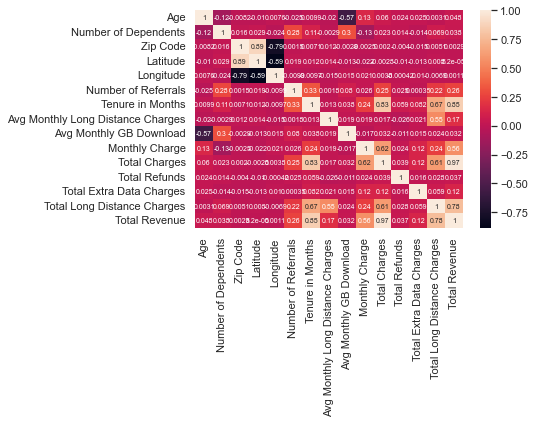

In [11]:
p1 = sns.heatmap(
    temp
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)